In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 50)
pd.set_option('display.precision', 3)
pd.option_context('display.max_rows', 50)

import prepare

In [2]:
# get the data
intakes = pd.read_csv('aac_intakes_20220304.csv')
outcomes = pd.read_csv('aac_outcomes_20220304.csv')

In [3]:
df = prepare.aac_prep(intakes, outcomes)
df = prepare.aac_get_dogs(df)

In [100]:
target = 'outcome_type'

In [4]:
df.head()

,intake_type,intake_condition,animal_type,outcome_type,month_intake,fixed,sex,breed_mixed,breed_1,color_1,age_intake
0,Stray,Normal,Dog,Transfer,January,True,male,True,Beagle,Tricolor,730 days
1,Stray,Normal,Dog,Return to Owner,July,True,female,False,English Springer Spaniel,White,2920 days
2,Stray,Normal,Dog,Return to Owner,April,False,male,True,Basenji,Sable,330 days
4,Stray,Normal,Dog,Return to Owner,June,True,male,True,Doberman Pinsch,Tan,1460 days
5,Owner Surrender,Normal,Dog,Return to Owner,February,True,male,True,Labrador Retriever,Chocolate,730 days


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53446 entries, 0 to 110678
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype          
---  ------            --------------  -----          
 0   intake_type       53446 non-null  object         
 1   intake_condition  53446 non-null  object         
 2   animal_type       53446 non-null  object         
 3   outcome_type      53446 non-null  object         
 4   month_intake      53446 non-null  object         
 5   fixed             53445 non-null  object         
 6   sex               53445 non-null  object         
 7   breed_mixed       53446 non-null  bool           
 8   breed_1           53446 non-null  object         
 9   color_1           53446 non-null  object         
 10  age_intake        53446 non-null  timedelta64[ns]
dtypes: bool(1), object(9), timedelta64[ns](1)
memory usage: 4.5+ MB


In [14]:
df.shape

(53446, 11)

### UNIVARIATE

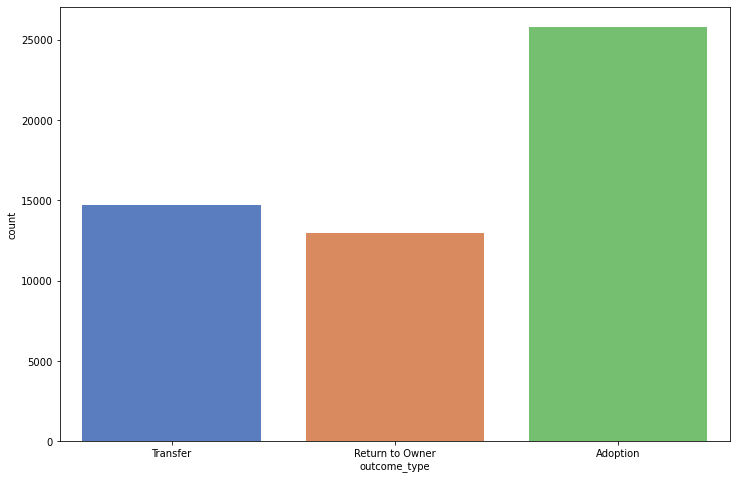

In [130]:
plt.figure(figsize=(12,8))
sns.countplot(df[target], palette='muted')
plt.show()

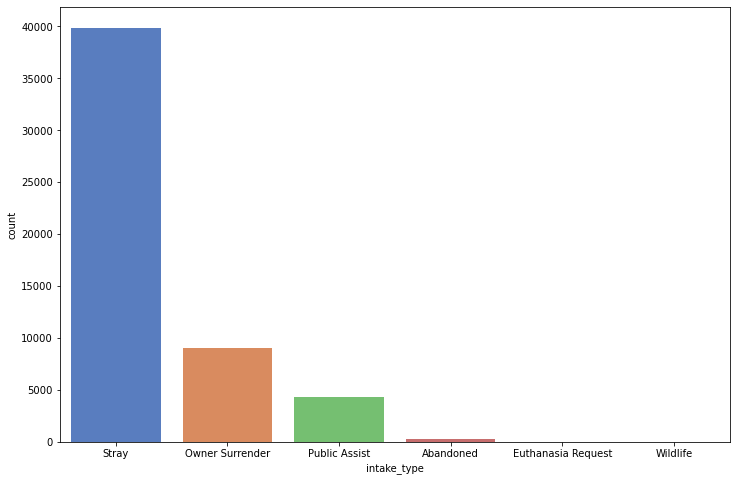

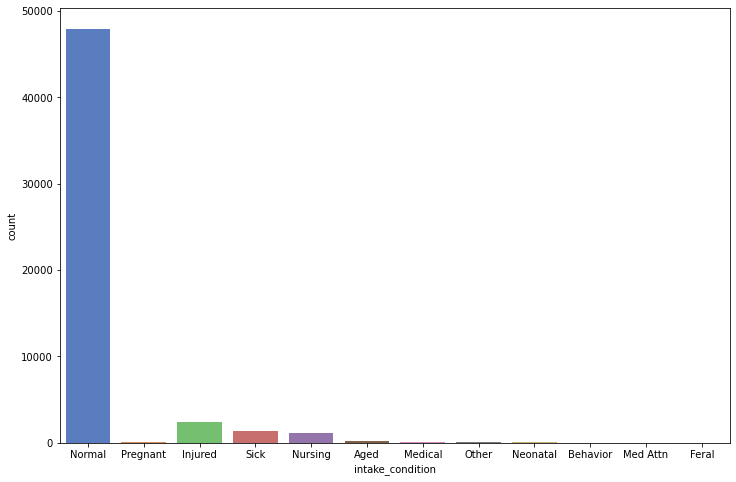

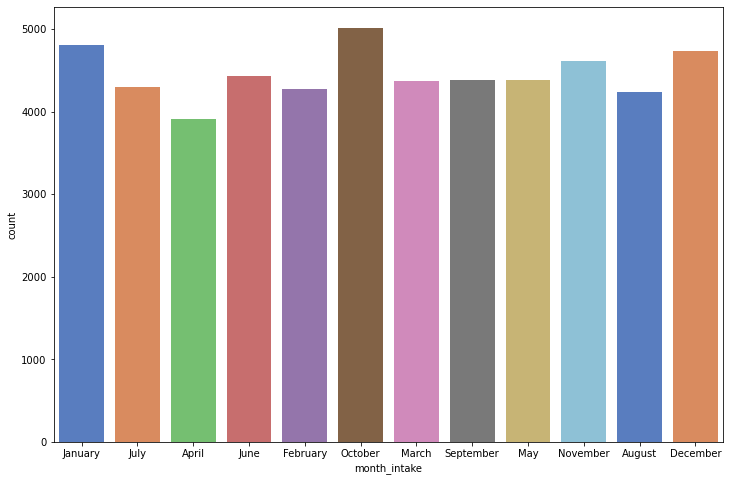

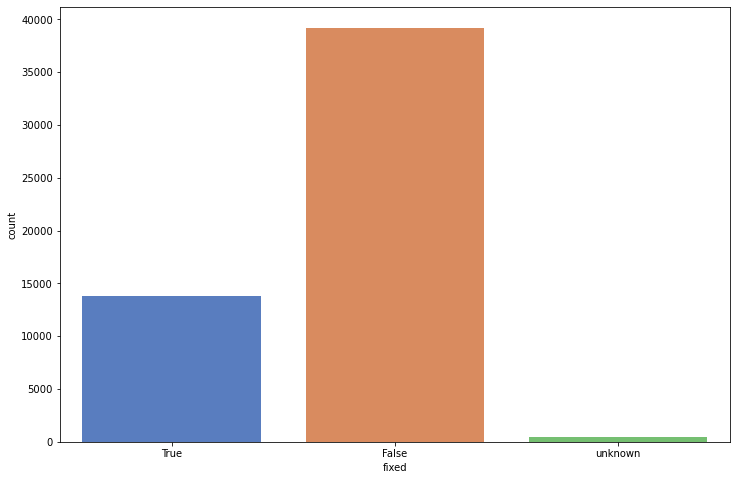

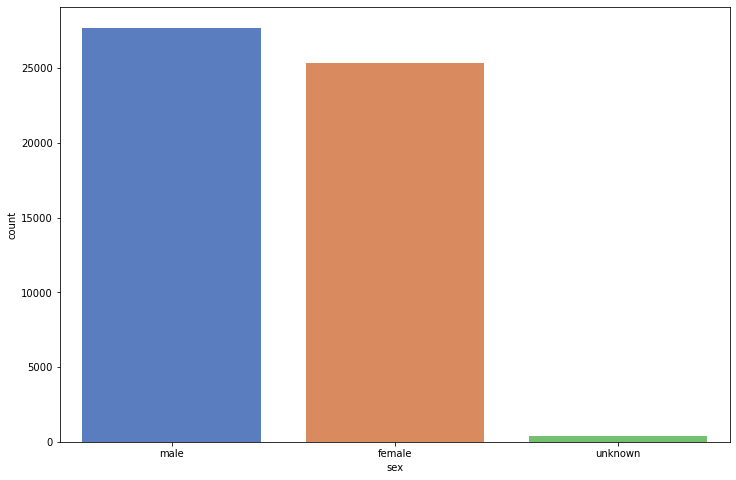

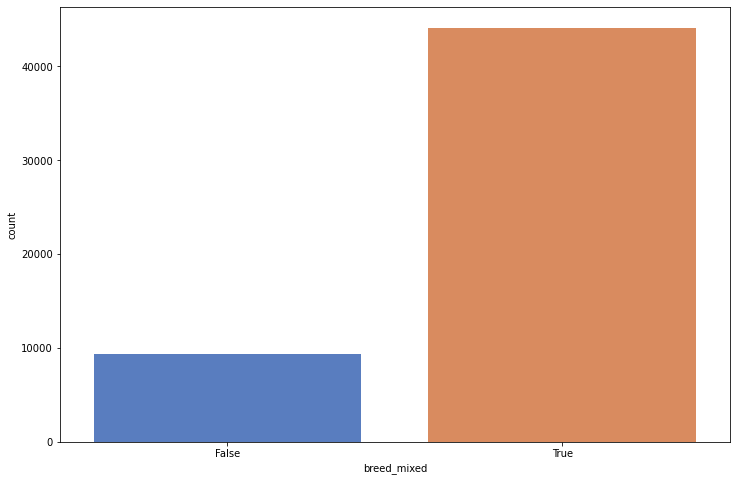

In [132]:
cols = ['intake_type', 'intake_condition', 
        'month_intake', 'fixed', 'sex', 'breed_mixed']
for col in cols:
    plt.figure(figsize=(12,8))
    sns.countplot(df[col], palette='muted')
    plt.show()

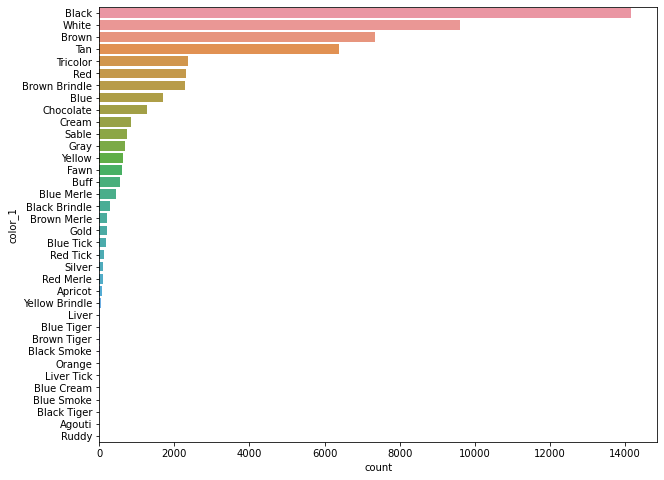

In [96]:
plt.figure(figsize=(10,8))
sns.countplot(data=df, y='color_1', 
              order=df['color_1'].value_counts().index)
plt.show()

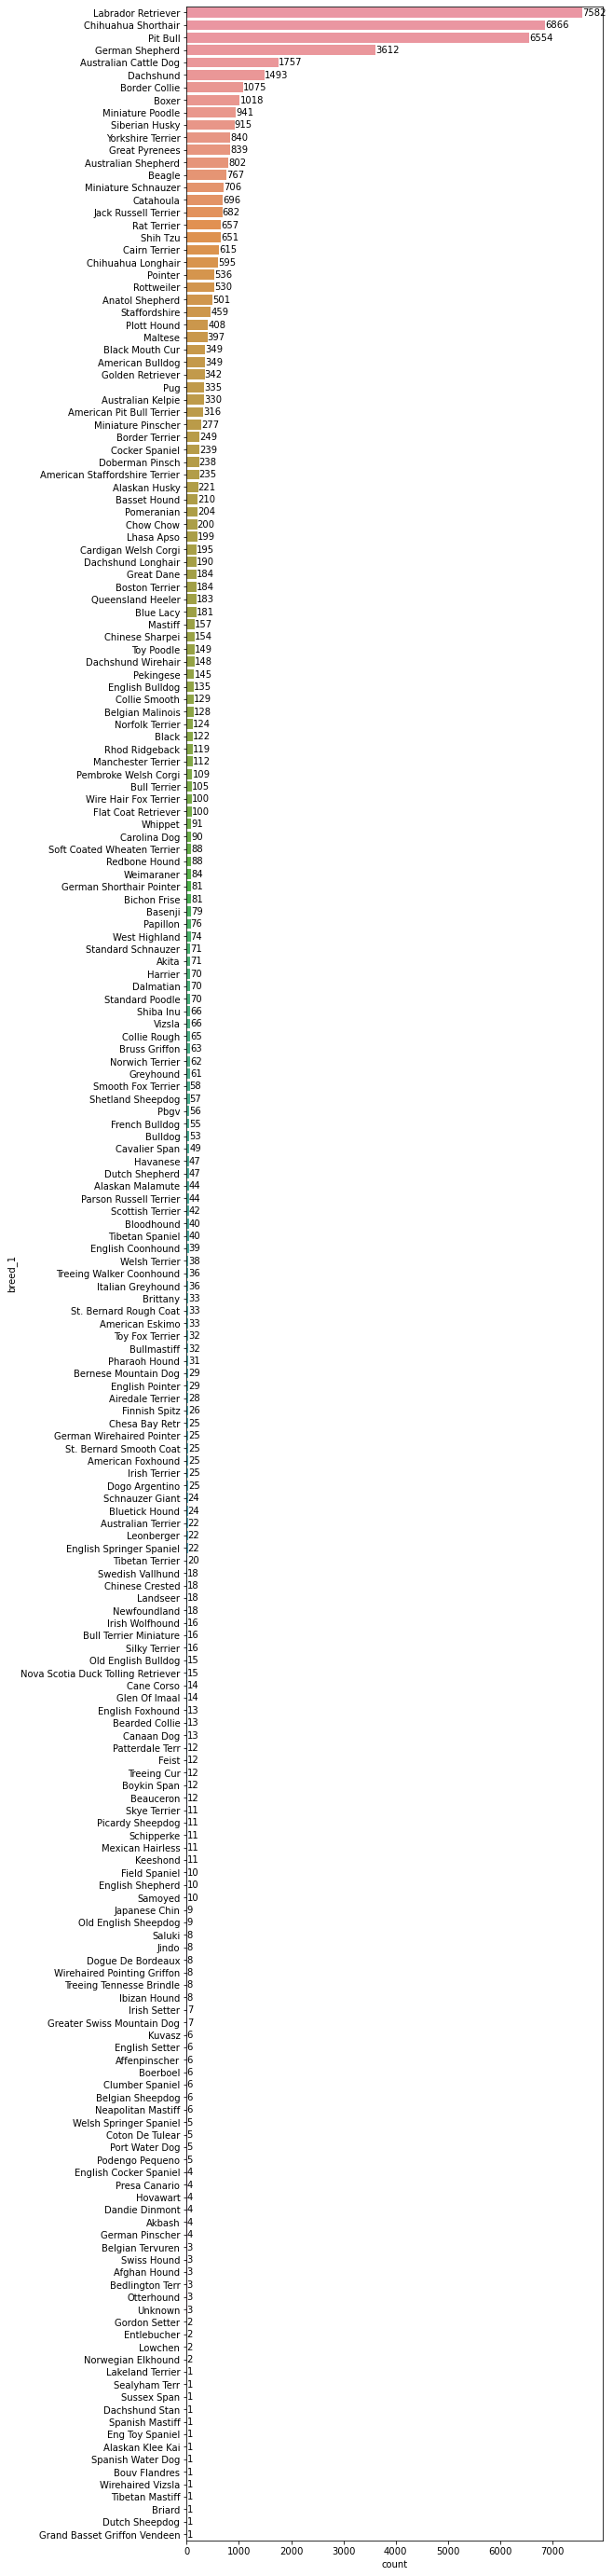

In [98]:
plt.figure(figsize=(8,50))
ax = sns.countplot(data=df, y='breed_1', 
              order=df['breed_1'].value_counts().index)
for container in ax.containers:
    ax.bar_label(container)

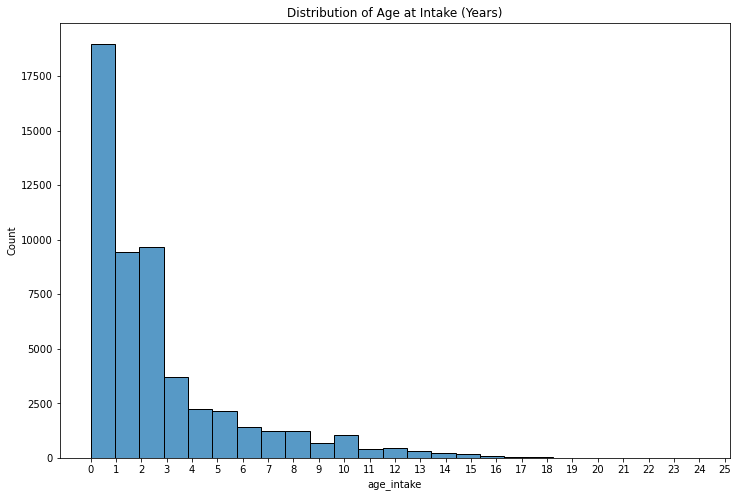

In [93]:
plt.figure(figsize=(12,8))
sns.histplot(df.age_intake / pd.Timedelta(days=1) / 365, bins=25)
plt.xticks(range(26))
plt.title('Distribution of Age at Intake (Years)')
plt.show()

### BIVARIATE

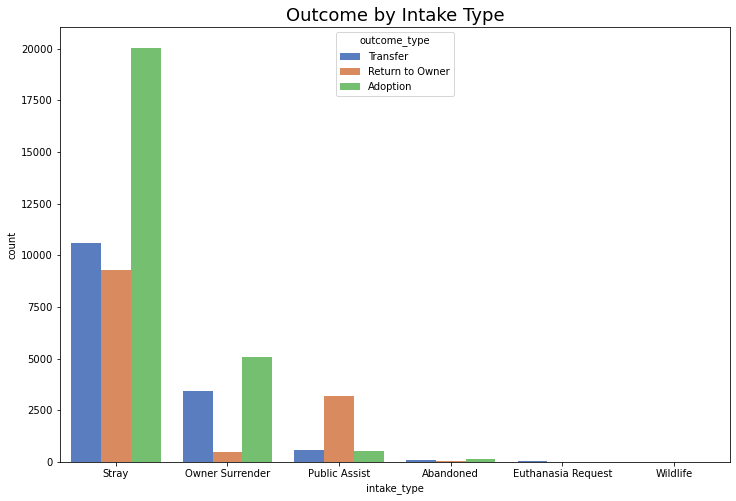

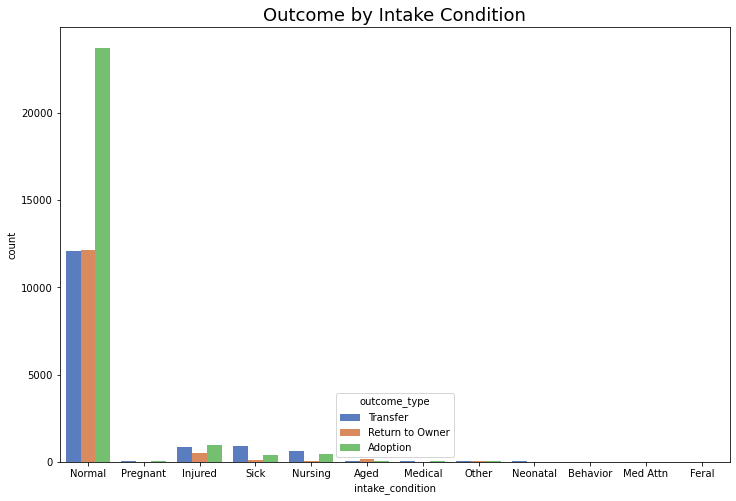

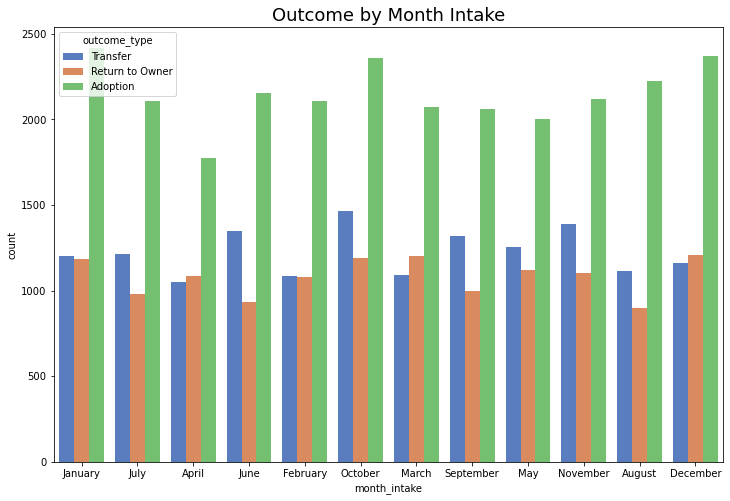

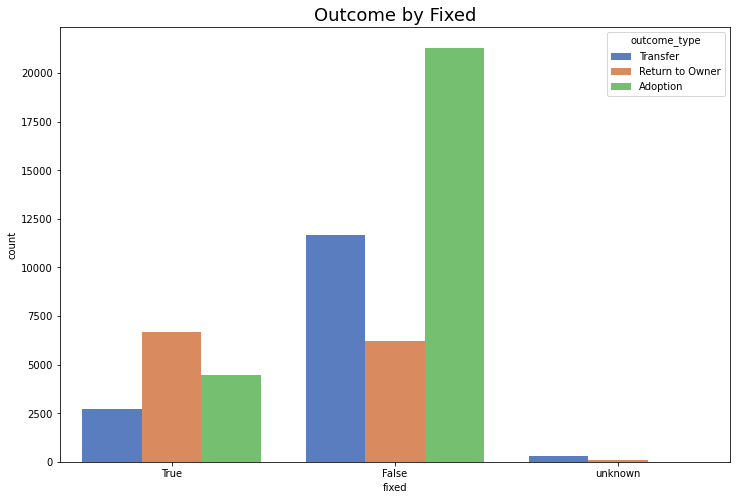

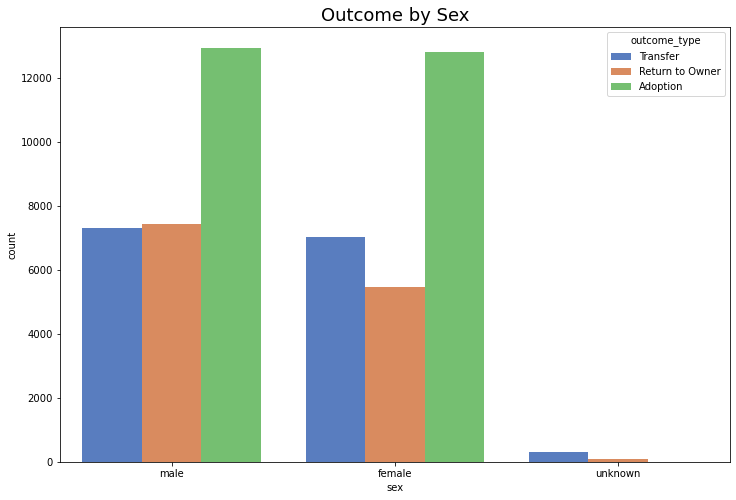

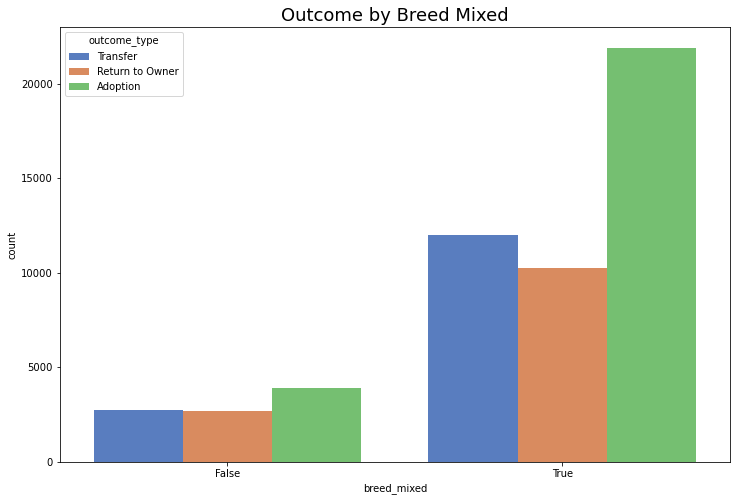

In [129]:
cols = ['intake_type', 'intake_condition', 
        'month_intake', 'fixed', 'sex', 'breed_mixed']
for col in cols:
    plt.figure(figsize=(12,8))
    sns.countplot(data=df, x=col, hue='outcome_type', palette='muted')
    plt.title(f"Outcome by {col.title().replace('_', ' ')}", fontsize=18)
    plt.legend(loc='upper_right')
    plt.show()

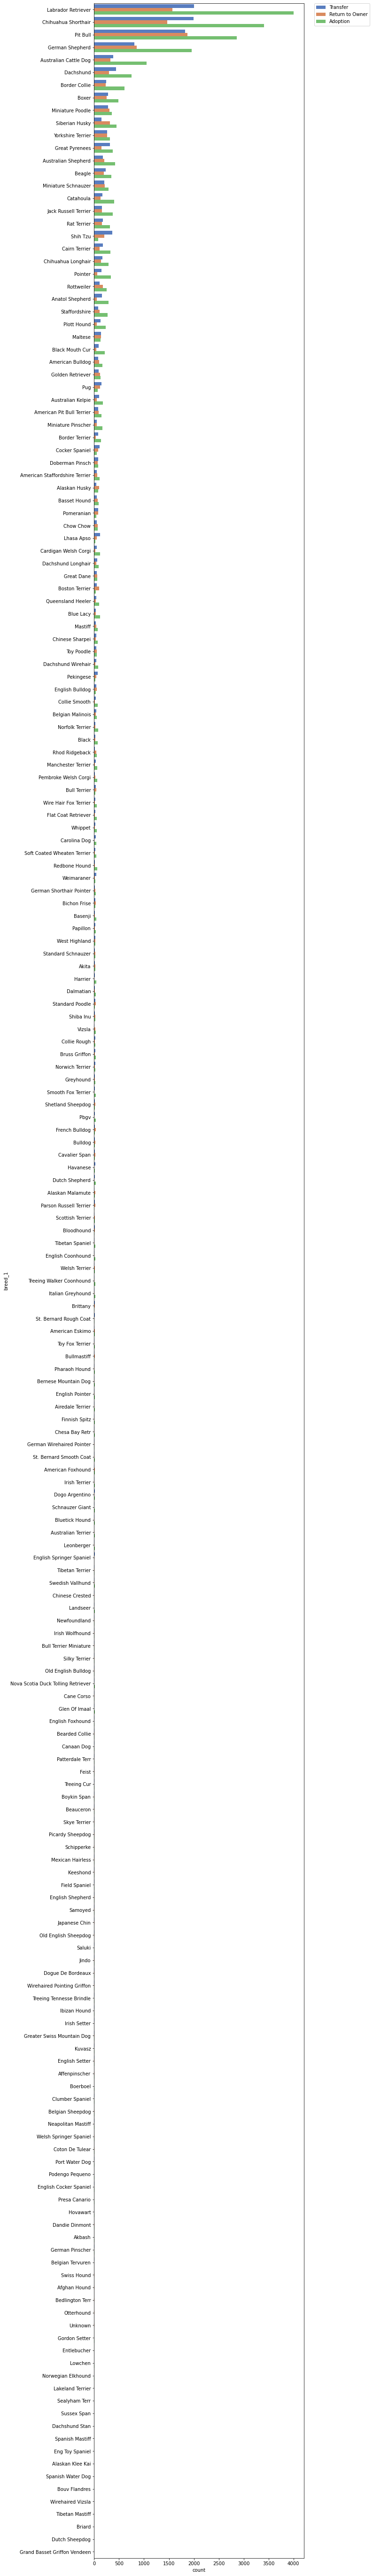

In [142]:
plt.figure(figsize=(8,100))
sns.countplot(data=df, y='breed_1', hue='outcome_type', 
                   order=df['breed_1'].value_counts().index,
                   palette='muted')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

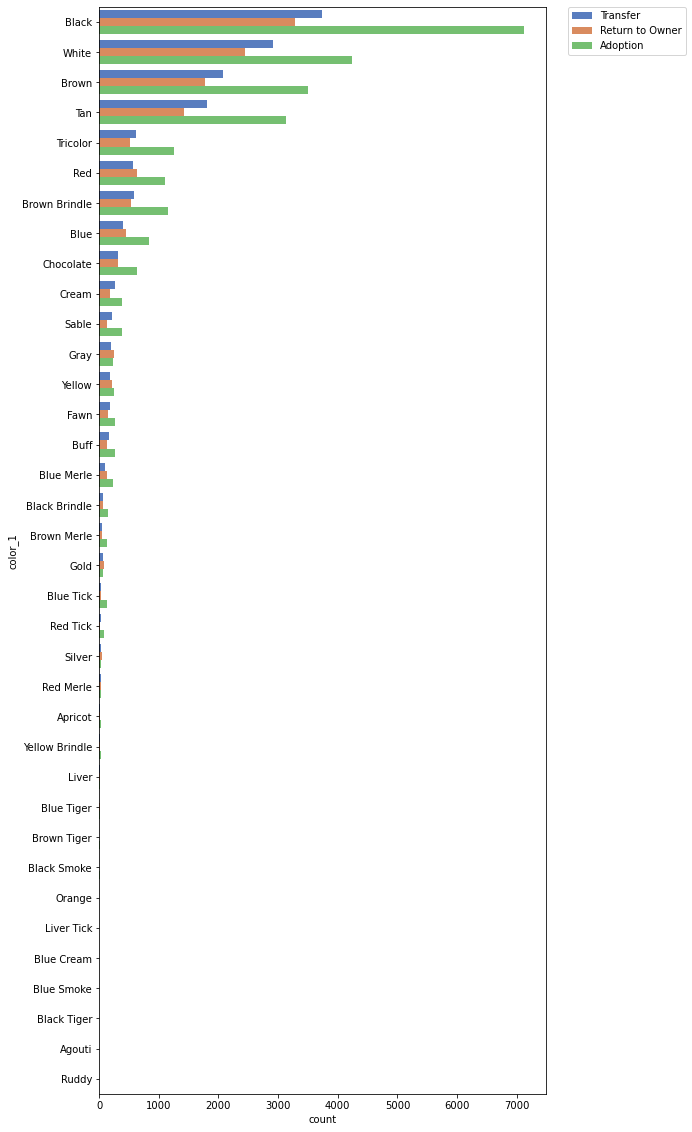

In [146]:
plt.figure(figsize=(8,20))
sns.countplot(data=df, y='color_1', hue='outcome_type', 
                   order=df['color_1'].value_counts().index,
                   palette='muted')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()